# Missouri Presidential Primary Results

In this notebook, I will dig into the county-level election results for Missouri's Presidential Primary contests, which were held on March 10, 2020.

These results are published starting at 7 pm central time on the night of the election via an XML feed.

The plan:

1. Read in the XML.
2. Filter the data into subsets for each parties primary.
3. Display the winner in each county via a choropleth map of the entire state.

In [2]:
import xml.etree.ElementTree as et
import pandas as pd
import altair as alt

## Preparing the data

In [3]:
tree = et.parse("results.xml")

In [4]:
root = tree.getroot()

In [5]:
print(root.tag)

ElectionResults


In [6]:
print(root.attrib)

{'LastUpdated': '3/10/2020 10:52:10 PM'}


In [7]:
rows = []

In [8]:
for county in root.find('ElectionInfo').find('TypeRace').find('Race').findall('Counties'):
    for party in county.find('CountyResults').findall('Party'):
        for candidate in party.findall('Candidate'):
            row = [
                county.find('CountyName').text,
                int(county.find('CountyResults').find('ReportingPrecincts').text),
                int(county.find('CountyResults').find('TotalPrecincts').text),
                party.find('PartyName').text,
                candidate.find('CandidateID').text,
                candidate.find('LastName').text,
                int(candidate.find('YesVotes').text)
            ]
            rows.append(row)

In [9]:
full_results = pd.DataFrame(rows,
    columns=[
        'CountyName', 'ReportingPrecincts', 'TotalPrecincts', 'PartyName', 'CandidateID',
        'LastName', 'YesVotes'
    ]
)

In [10]:
full_results.head()

,CountyName,ReportingPrecincts,TotalPrecincts,PartyName,CandidateID,LastName,YesVotes
0,Adair,12,12,Republican,750117286,Donald J Trump,1129
1,Adair,12,12,Republican,750117300,Bob Ely,5
2,Adair,12,12,Republican,750117328,Bill Weld,19
3,Adair,12,12,Republican,750117330,Joe Walsh,14
4,Adair,12,12,Republican,750117334,Matthew John Matern,2


In [11]:
full_results.PartyName.value_counts().reset_index()

,index,PartyName
0,Democratic,2668
1,Republican,696
2,Green,464
3,Constitution,348
4,Libertarian,232


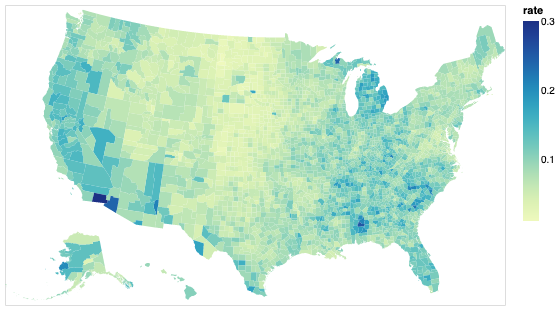

In [12]:
from vega_datasets import data

alt.renderers.enable('mimetype')

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)